In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target.copy()

In [6]:
# 转换成二分类问题
y[y!=0] = 1

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=86)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_predict = logistic_regression.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [12]:
decision_scores = logistic_regression.decision_function(X_test)
# 返回的是样本到决策边界的有符号距离（决策分数）
decision_scores

array([-4.29617659,  6.59872685, -3.33840467,  4.0764338 , -3.65475669,
        9.42495075,  4.64524005,  8.14962564,  8.06352701,  3.27401896,
       -3.78730579,  4.52399639,  5.70246485, -3.67712705,  6.20522591,
        7.78521651,  3.86670363,  8.2537932 , -3.60233385,  8.74087321,
       -3.92012298,  6.77041551, -3.51623523, 10.31417451,  3.35212855,
        4.95944469, -4.21792963,  5.09360042, 11.829147  ,  4.42212803,
        8.83676919, -4.15785682,  4.78909457, -4.23449714,  2.86374881,
        5.40237343,  1.15014987,  6.39999521])

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_scores = []
recall_scores = []
thresholds = np.sort(decision_scores)
for threshold in thresholds:
    y_predict = np.array(decision_scores>=threshold,dtype='int')
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    precision_scores.append(precision)
    recall_scores.append(recall)

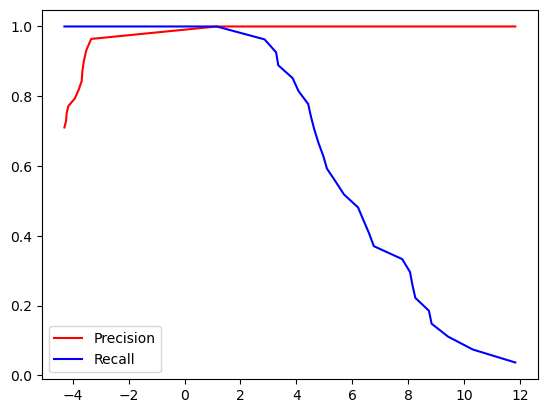

In [32]:
plt.plot(thresholds,precision_scores,color='r',label="Precision")
plt.plot(thresholds,recall_scores,color='b',label="Recall")
plt.legend()
plt.show()

### Precision_Recall曲线

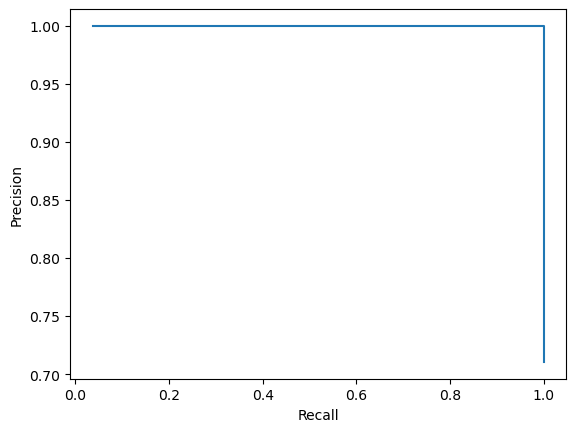

In [37]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### scikit-learn中的PR曲线

In [43]:
from sklearn.metrics import precision_recall_curve

precision_scores,recall_scores,thresholds=precision_recall_curve(y_test,decision_scores)

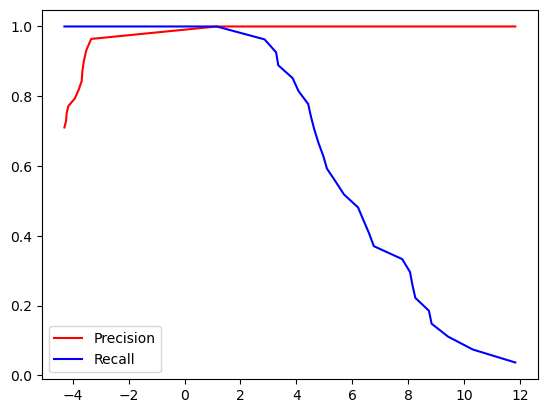

In [45]:
plt.plot(thresholds,precision_scores[:-1],color='r',label="Precision")
plt.plot(thresholds,recall_scores[:-1],color='b',label="Recall")
plt.legend()
plt.show()

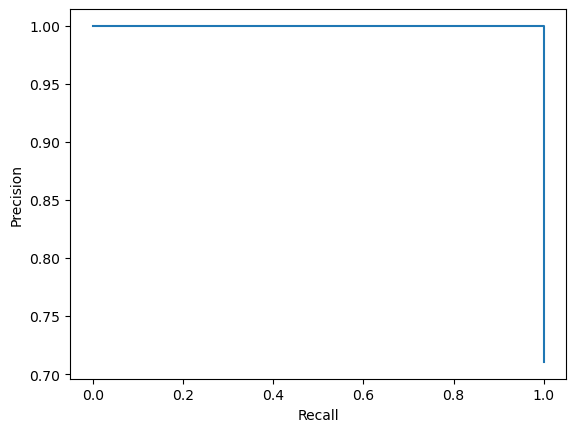

In [47]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## ROC曲线
### Reveiver Operation Characteristic Curve

In [50]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,decision_scores)

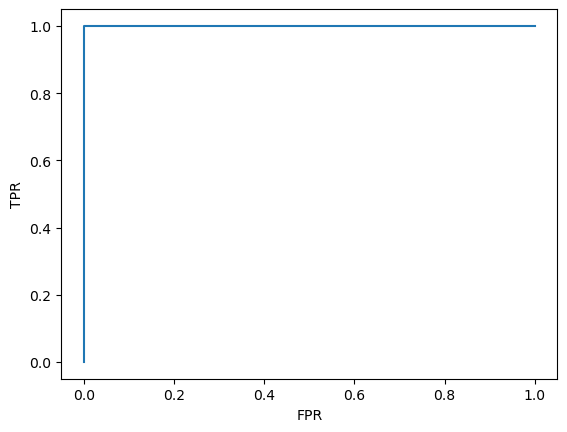

In [52]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## AUC
### area under curve

In [62]:
from sklearn.metrics import roc_auc_score
# 计算ROC曲线与x轴围成的面积，面积越大表示训练出的模型越好
auc = roc_auc_score(y_test,decision_scores)
auc
# 当auc的值介于0.5~1之间时，说明模型的判断优于随机猜测

1.0